In [1]:
import numpy as np
import scipy as sp
import scipy.integrate as spint

import matplotlib.pyplot as plt
import pdb

from rocketPy.solution import Solution as SolutionBranch
from rocketPy.simulation import Simulation as Sim

In [2]:
class VerySimpleRocket():
    
    def __init__(self):
        self.m = 40
        self.T = 4000
        self.g = 9.81
        self.y0 = np.array([0., 0.])
        self.rhoCDA1 = 0.05
        self.rhoCDA2 = 0.1
        
        self.stage_list = [0,1,2]
        self.staging_functions = [self.staging_deploy_drogue,self.staging_deploy_main, self.staging_landing]
        self.nominal_stages = [0,1,2] # defines this as a nominal flight
        
    def staging_deploy_drogue(self,t,y,stage=0):
        return y[1]
    staging_deploy_drogue.terminal = False
    staging_deploy_drogue.direction=-1
    staging_deploy_drogue.trigger_if_stage_in =[0]
    staging_deploy_drogue.possible_next_stages = [1,2]
    staging_deploy_drogue.nominal_next_stage = 1
    staging_deploy_drogue.t_offset = 7 #stages 7 seconds after the apogee is detected
    staging_deploy_drogue.modify_state = lambda self, state: self.modify_state_drogue_deployed(state)
    
    def staging_deploy_main(self, t, y, stage=0):
        return y[0]-2500
    staging_deploy_main.terminal = False
    staging_deploy_main.direction = -1
    staging_deploy_main.trigger_if_stage_in =[0,1]
    staging_deploy_main.possible_next_stages = [ 2]
    staging_deploy_main.nominal_next_stage = 2
    staging_deploy_main.t_offset = 0
    staging_deploy_main.modify_state = None
    
    def staging_landing(self, t, y, stage=0):
        return y[0]
    staging_landing.terminal = True
    staging_landing.direction = -1
    staging_landing.trigger_if_stage_in =[0,1,2]
    staging_landing.possible_next_stages = []
    staging_landing.nominal_next_stage = None
    staging_landing.t_offset = 0
    staging_landing.modify_state = None
    
    def modify_state_drogue_deployed(self, state):
        
        # this function replaces the state when the corresponding branch is explored
        
        state[0] += 1000
        return state
    
        
    def dynamics(self, t, y, stage=0):

        if stage == 0:
            if t<4:
                return np.array([y[1], self.T/self.m - self.g])
            else:
                return np.array([y[1], -self.g])
                
        elif stage == 1:
            return np.array([y[1], -0.5*self.rhoCDA1*y[1]*abs(y[1])/self.m - self.g])
        
        elif stage == 2:
            return np.array([y[1], -0.5*self.rhoCDA2*y[1]*abs(y[1])/self.m - self.g])
        
        else:
            raise ValueError

In [3]:
from collections.abc import Iterable

In [4]:
tup = [8,7]

In [5]:
isinstance(tup, Iterable)

True

In [6]:
r = VerySimpleRocket()

In [7]:
s = Sim(r)

In [8]:
s

In [9]:
sol=s.solve([0,600], r.y0, 0, user_events=r.staging_functions)

In [10]:
sol.sols

[  message: 'A termination event occurred.'
      nfev: 98
      njev: 0
       nlu: 0
       sol: <scipy.integrate._ivp.common.OdeSolution object at 0x11581f7b8>
    status: 1
   success: True
         t: array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, 1.11000000e-02,
        1.11100000e-01, 1.11110000e+00, 2.79214387e+00, 3.62727257e+00,
        4.46240128e+00, 5.31679544e+00, 1.38607371e+01, 8.10612092e+01])
  t_events: [array([41.57554744]), array([73.97050835]), array([81.06120925])]
         y: array([[ 0.00000000e+00,  4.50950000e-07,  5.45649500e-05,
          5.55615495e-03,  5.56617055e-01,  5.56717261e+01,
          3.51563658e+02,  5.93319709e+02,  8.91394822e+02,
          1.19888202e+03,  3.87988823e+03,  2.27373675e-12],
        [ 0.00000000e+00,  9.01900000e-03,  9.92090000e-02,
          1.00110900e+00,  1.00201090e+01,  1.00210109e+02,
          2.51823455e+02,  3.27143713e+02,  3.64079964e+02,
          3.55698357e+02,  2.71882290e+02, -3.87354342e+02]])
  y_e

In [11]:
nominal_sol = s.nominal_solve([0,6000], r.y0, 0)

In [12]:
nominal_sol.sol(0)

array([0., 0.])

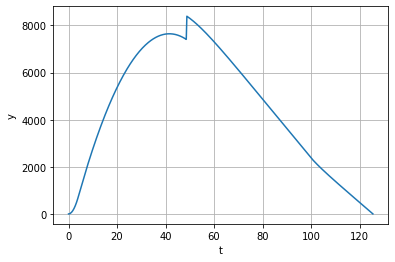

In [13]:
t_range = np.linspace(nominal_sol.t_min(), nominal_sol.t_max(), 500)
plt.plot(t_range, nominal_sol.sol(t_range)[0])
plt.xlabel('t')
plt.ylabel('y')
plt.grid()

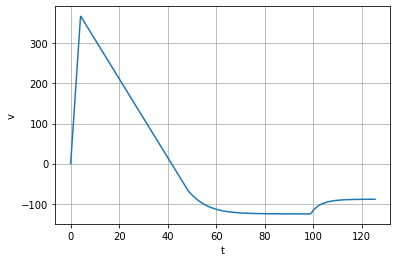

In [14]:
t_range = np.linspace(nominal_sol.t_min(), nominal_sol.t_max(), 500)
plt.plot(t_range, nominal_sol.sol(t_range)[1])
plt.xlabel('t')
plt.ylabel('v')
plt.grid()

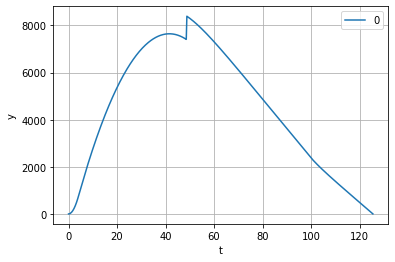

In [15]:
i=0;
t_range = np.linspace(nominal_sol.t_min(),nominal_sol.t_max(), 500)
plt.plot(t_range,nominal_sol.sol(t_range)[0], label=i)

    #plt.xlim([0,50])
plt.grid()
plt.xlabel('t')
plt.ylabel('y')
plt.legend()

In [16]:
full_sol = s.full_solve([0,6000], r.y0, 0)

In [17]:
full_sol

[Solution:
 [
  Stages: [0]
  ODEresults: [  message: 'A termination event occurred.'
      nfev: 98
      njev: 0
       nlu: 0
       sol: <scipy.integrate._ivp.common.OdeSolution object at 0x1178d7ac8>
    status: 1
   success: True
         t: array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, 1.11000000e-02,
        1.11100000e-01, 1.11110000e+00, 2.79214387e+00, 3.62727257e+00,
        4.46240128e+00, 5.31679544e+00, 1.38607371e+01, 8.10612092e+01])
  t_events: [array([41.57554744]), array([73.97050835]), array([81.06120925])]
         y: array([[ 0.00000000e+00,  4.50950000e-07,  5.45649500e-05,
          5.55615495e-03,  5.56617055e-01,  5.56717261e+01,
          3.51563658e+02,  5.93319709e+02,  8.91394822e+02,
          1.19888202e+03,  3.87988823e+03,  2.27373675e-12],
        [ 0.00000000e+00,  9.01900000e-03,  9.92090000e-02,
          1.00110900e+00,  1.00201090e+01,  1.00210109e+02,
          2.51823455e+02,  3.27143713e+02,  3.64079964e+02,
          3.55698357e+02,

In [18]:
len(full_sol)

5

In [19]:
type(full_sol[2])

rocketPy.solution.Solution

In [20]:
full_sol[0]

Solution:
[
 Stages: [0]
 ODEresults: [  message: 'A termination event occurred.'
     nfev: 98
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x1178d7ac8>
   status: 1
  success: True
        t: array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, 1.11000000e-02,
       1.11100000e-01, 1.11110000e+00, 2.79214387e+00, 3.62727257e+00,
       4.46240128e+00, 5.31679544e+00, 1.38607371e+01, 8.10612092e+01])
 t_events: [array([41.57554744]), array([73.97050835]), array([81.06120925])]
        y: array([[ 0.00000000e+00,  4.50950000e-07,  5.45649500e-05,
         5.55615495e-03,  5.56617055e-01,  5.56717261e+01,
         3.51563658e+02,  5.93319709e+02,  8.91394822e+02,
         1.19888202e+03,  3.87988823e+03,  2.27373675e-12],
       [ 0.00000000e+00,  9.01900000e-03,  9.92090000e-02,
         1.00110900e+00,  1.00201090e+01,  1.00210109e+02,
         2.51823455e+02,  3.27143713e+02,  3.64079964e+02,
         3.55698357e+02,  2.71882290e+02, -3.8

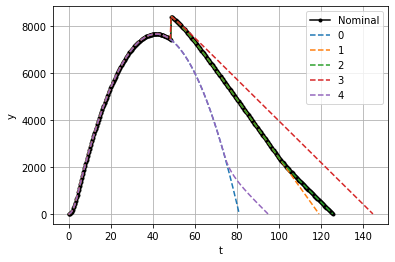

In [29]:
t_range = np.linspace(nominal_sol.t_min(),nominal_sol.t_max(), 500)
plt.plot(t_range,nominal_sol.sol(t_range)[0], '.-k', label='Nominal')
i=0;

for sol in full_sol:
    t_range = np.linspace(sol.t_min(),sol.t_max(), 500)
    plt.plot(t_range,sol.sol(t_range)[0], '--',label=i)
    i+=1
    #plt.xlim([0,50])
    


plt.grid()
plt.xlabel('t')
plt.ylabel('y')
plt.legend()

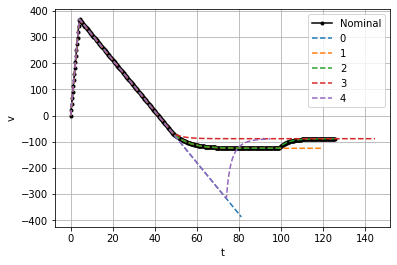

In [30]:
t_range = np.linspace(nominal_sol.t_min(),nominal_sol.t_max(), 500)
plt.plot(t_range,nominal_sol.sol(t_range)[1], '.-k', label='Nominal')

i=0;
for sol in full_sol:
    t_range = np.linspace(sol.t_min(),sol.t_max(), 500)
    plt.plot(t_range,sol.sol(t_range)[1], '--',label=i)
    i+=1
    #plt.xlim([0,50])
    


plt.grid()
plt.xlabel('t')
plt.ylabel('v')
plt.legend()

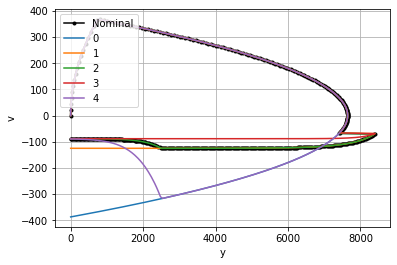

In [31]:
# sometimes its easier to see it in the state space
t_range = np.linspace(nominal_sol.t_min(),nominal_sol.t_max(), 500)
plt.plot(nominal_sol.sol(t_range)[0],nominal_sol.sol(t_range)[1], '.-k', label='Nominal')


i=0;
for sol in full_sol:
    t_range = np.linspace(sol.t_min(),sol.t_max(), 500)
    plt.plot(sol.sol(t_range)[0],sol.sol(t_range)[1], label=i)
    i+=1
    #plt.xlim([0,50])
plt.grid()
plt.xlabel('y')
plt.ylabel('v')
plt.legend()

In [32]:
len(full_sol)

5

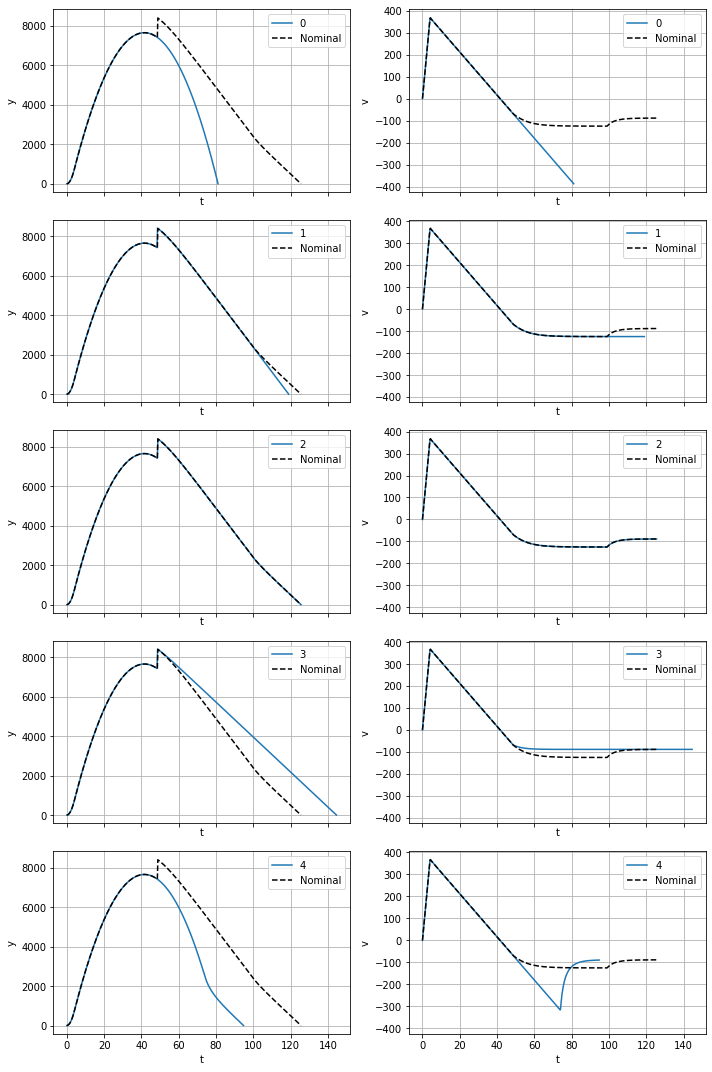

In [38]:
i=0;
fig, axes = plt.subplots(len(full_sol),2, sharex='col', sharey='col', figsize=(10,15), squeeze=False)
for sol in full_sol:
    
    t_range_nom = np.linspace(nominal_sol.t_min(),nominal_sol.t_max(), 500)
    axes[i][0].plot(t_range_nom,nominal_sol.sol(t_range_nom)[0], '--k', label='Nominal')
    axes[i][1].plot(t_range_nom,nominal_sol.sol(t_range_nom)[1], '--k', label='Nominal')
    
    t_range = np.linspace(sol.t_min(),sol.t_max(), 500)
    axes[i][0].plot(t_range,sol.sol(t_range)[0], label=i)
    axes[i][1].plot(t_range,sol.sol(t_range)[1], label=i)
    
    axes[i][0].grid(True)
    axes[i][0].set_xlabel('t')
    axes[i][0].set_ylabel('y')
    axes[i][0].legend()
    
    axes[i][1].grid(True)
    axes[i][1].set_xlabel('t')
    axes[i][1].set_ylabel('v')
    axes[i][1].legend()
    i+=1
    
plt.tight_layout()
